In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('ev_data.csv')
data.head()

,age,city,profession,marital_stat,education,family_count,annual_income,replace_with_ev,preferred_ev_type,think_ev_are_economical,preferred_brand,preferred_price_range,preferred_wheel_count
0,30,New Delhi,Working Professional,Single,Post Graduate,4,1.770466e+06,Yes,SUV,Yes,MG,<5 lakhs,2
1,27,Ahmedabad,NaN,Single,Post Graduate,4,7.600731e+05,Yes,SUV,Yes,Nissan,<15 lakhs,4
2,28,Pune,Working Professional,Single,Post Graduate,4,2.779701e+06,Maybe,Sedan,Yes,Honda,<5 lakhs,4
3,26,Pune,Salaried,Single,Post Graduate,4,1.473698e+06,Yes,Sedan,Yes,Tata,<25 lakhs,2
4,25,Pune,Working Professional,Single,Post Graduate,4,2.430643e+06,Yes,Sedan,Yes,Hyundai,<15 lakhs,4


In [3]:
data.isnull().sum()

age                          0
city                         0
profession                 455
marital_stat                 0
education                    0
family_count                 0
annual_income                0
replace_with_ev              0
preferred_ev_type            0
think_ev_are_economical      0
preferred_brand              0
preferred_price_range        0
preferred_wheel_count        0
dtype: int64

In [4]:
data.shape

(990, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      990 non-null    int64  
 1   city                     990 non-null    object 
 2   profession               535 non-null    object 
 3   marital_stat             990 non-null    object 
 4   education                990 non-null    object 
 5   family_count             990 non-null    int64  
 6   annual_income            990 non-null    float64
 7   replace_with_ev          990 non-null    object 
 8   preferred_ev_type        990 non-null    object 
 9   think_ev_are_economical  990 non-null    object 
 10  preferred_brand          990 non-null    object 
 11  preferred_price_range    990 non-null    object 
 12  preferred_wheel_count    990 non-null    int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 100.7+ KB


In [6]:
data.describe()

,age,family_count,annual_income,preferred_wheel_count
count,990.000000,990.000000,9.900000e+02,990.000000
mean,31.802020,4.116162,2.261180e+06,3.350505
std,11.279929,1.469488,1.001444e+06,0.886578
min,15.000000,0.000000,-3.761509e+05,2.000000
25%,26.000000,4.000000,1.794900e+06,2.000000
50%,29.000000,4.000000,2.329246e+06,4.000000
75%,31.000000,5.000000,2.758737e+06,4.000000
max,118.000000,8.000000,1.282128e+07,4.000000


In [7]:
df1 = data.drop(['profession', 'education', 'think_ev_are_economical', 'family_count'], axis = 1)
df1.head()

,age,city,marital_stat,annual_income,replace_with_ev,preferred_ev_type,preferred_brand,preferred_price_range,preferred_wheel_count
0,30,New Delhi,Single,1.770466e+06,Yes,SUV,MG,<5 lakhs,2
1,27,Ahmedabad,Single,7.600731e+05,Yes,SUV,Nissan,<15 lakhs,4
2,28,Pune,Single,2.779701e+06,Maybe,Sedan,Honda,<5 lakhs,4
3,26,Pune,Single,1.473698e+06,Yes,Sedan,Tata,<25 lakhs,2
4,25,Pune,Single,2.430643e+06,Yes,Sedan,Hyundai,<15 lakhs,4


In [8]:
rwe = df1['replace_with_ev'].value_counts()
rwe

replace_with_ev
Yes      655
Maybe    200
No       135
Name: count, dtype: int64

**Customer segmentation based on if they would like to change their current vehicle with a new EV**

In [9]:
ms = df1['marital_stat'].value_counts()
ms

marital_stat
Single     631
Married    359
Name: count, dtype: int64

In [10]:
pb = df1['preferred_brand'].value_counts()
pb

preferred_brand
Tata             184
Hyundai          164
Honda            143
KIA              142
Nissan           121
Maruti            58
MG                55
Volkswagen        42
McLaren           18
Chevrolet         13
BMW               12
Maruti Suzuki     11
Audi               9
Suzuki             7
Maruti             7
Nexa               4
Name: count, dtype: int64

In [11]:
pev = df1['preferred_ev_type'].value_counts()
pev

preferred_ev_type
SUV          462
Sedan        237
Hatchback    144
Liftback     118
Cabrio        29
Name: count, dtype: int64

In [12]:
ppr = df1['preferred_price_range'].value_counts()
ppr

preferred_price_range
<15 lakhs    479
<5 lakhs     285
<25 lakhs    145
>25 lakhs     34
1200000       14
2000000       12
1500000       11
700000        10
Name: count, dtype: int64

In [13]:
df1['preferred_price_range'] = df1['preferred_price_range'].replace({'<15 lakhs' : '15','<5 lakhs' : '5','<25 lakhs' : '25','>25 lakhs' : '30','1200000' : '12','2000000' : '20','1500000' : '15','700000' : '7'})
df1.head()

,age,city,marital_stat,annual_income,replace_with_ev,preferred_ev_type,preferred_brand,preferred_price_range,preferred_wheel_count
0,30,New Delhi,Single,1.770466e+06,Yes,SUV,MG,5,2
1,27,Ahmedabad,Single,7.600731e+05,Yes,SUV,Nissan,15,4
2,28,Pune,Single,2.779701e+06,Maybe,Sedan,Honda,5,4
3,26,Pune,Single,1.473698e+06,Yes,Sedan,Tata,25,2
4,25,Pune,Single,2.430643e+06,Yes,Sedan,Hyundai,15,4


In [14]:
pet = df1['preferred_ev_type'].value_counts()
pet

preferred_ev_type
SUV          462
Sedan        237
Hatchback    144
Liftback     118
Cabrio        29
Name: count, dtype: int64

In [15]:
pwc = df1['preferred_wheel_count'].value_counts()
pwc

preferred_wheel_count
4    623
2    276
3     91
Name: count, dtype: int64

In [16]:
c = df1['city'].value_counts()
c

city
Pune           565
Mumbai          45
Pune            37
Delhi           24
Nagpur          22
Satara          21
New Delhi       19
Nellore         17
Banglore        15
Noida           15
Chennai         14
Kashipur        13
Nashik          12
Ahmedabad       12
Chandrapur      12
Mumbai          11
Haldwani        11
Hakdwani        10
Faridabad        9
Delhi            8
Gurugram         8
pune             8
Rewari           8
Patiyala         8
Nabha            8
Bengaluru        8
Serampore        7
Karnal           7
Jalandhar        6
Haldwani         6
solapur          5
pUNE             5
New Delhi        5
nashik           5
Jhansi           4
Name: count, dtype: int64

In [17]:
df1["city"] = df1["city"].replace({"Pune":"Pune", "pUNE": "Pune", "pune": "Pune", "Pune ": "Pune"})
df1["city"] = df1["city"].replace({"Mumbai ":"Mumbai", "Mumbai": "Mumbai"})
df1["city"] = df1["city"].replace({"Banglore ":"Bengaluru"})
df1["city"] = df1["city"].replace({"Delhi":"New Delhi", "Delhi ": "New Delhi", "New Delhi ": "New Delhi"})
df1["city"] = df1["city"].replace({"Hakdwani":"Haldwani", "Haldwani ": "Haldwani"})
df1["city"] = df1["city"].replace({"nashik":"Nashik"})

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    990 non-null    int64  
 1   city                   990 non-null    object 
 2   marital_stat           990 non-null    object 
 3   annual_income          990 non-null    float64
 4   replace_with_ev        990 non-null    object 
 5   preferred_ev_type      990 non-null    object 
 6   preferred_brand        990 non-null    object 
 7   preferred_price_range  990 non-null    object 
 8   preferred_wheel_count  990 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 69.7+ KB


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
df1.columns

Index(['age', 'city', 'marital_stat', 'annual_income', 'replace_with_ev',
       'preferred_ev_type', 'preferred_brand', 'preferred_price_range',
       'preferred_wheel_count'],
      dtype='object')

In [21]:
df1['city'] = le.fit_transform(df1['city'].astype(str))
df1['marital_stat'] = le.fit_transform(df1['marital_stat'].astype(str))
df1['replace_with_ev'] = le.fit_transform(df1['replace_with_ev'].astype(str))
df1['preferred_ev_type'] = le.fit_transform(df1['preferred_ev_type'].astype(str))
df1['preferred_brand'] = le.fit_transform(df1['preferred_brand'].astype(str))
df1['preferred_price_range'] = le.fit_transform(df1['preferred_price_range'].astype(str))

In [22]:
df1.head()

,age,city,marital_stat,annual_income,replace_with_ev,preferred_ev_type,preferred_brand,preferred_price_range,preferred_wheel_count
0,30,16,1,1.770466e+06,2,3,6,5,2
1,27,0,1,7.600731e+05,2,3,12,1,4
2,28,19,1,2.779701e+06,0,4,3,5,4
3,26,19,1,1.473698e+06,2,4,14,3,2
4,25,19,1,2.430643e+06,2,4,4,1,4


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    990 non-null    int64  
 1   city                   990 non-null    int64  
 2   marital_stat           990 non-null    int64  
 3   annual_income          990 non-null    float64
 4   replace_with_ev        990 non-null    int64  
 5   preferred_ev_type      990 non-null    int64  
 6   preferred_brand        990 non-null    int64  
 7   preferred_price_range  990 non-null    int64  
 8   preferred_wheel_count  990 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 69.7 KB


In [24]:
col_avg = np.round(df1.mean(), 2)
col_avg

age                           31.80
city                          16.10
marital_stat                   0.64
annual_income            2261179.88
replace_with_ev                1.46
preferred_ev_type              2.74
preferred_brand                7.77
preferred_price_range          2.60
preferred_wheel_count          3.35
dtype: float64

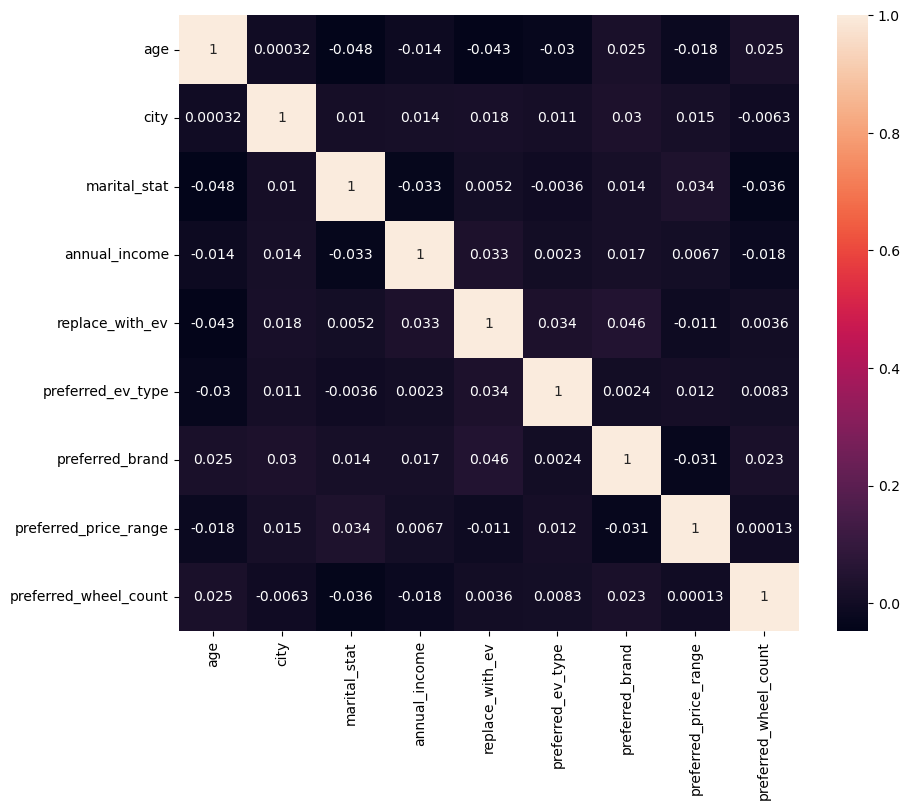

In [25]:
plt.figure(figsize = (10, 8))
sns.heatmap(df1.corr(), annot = True)
plt.show()

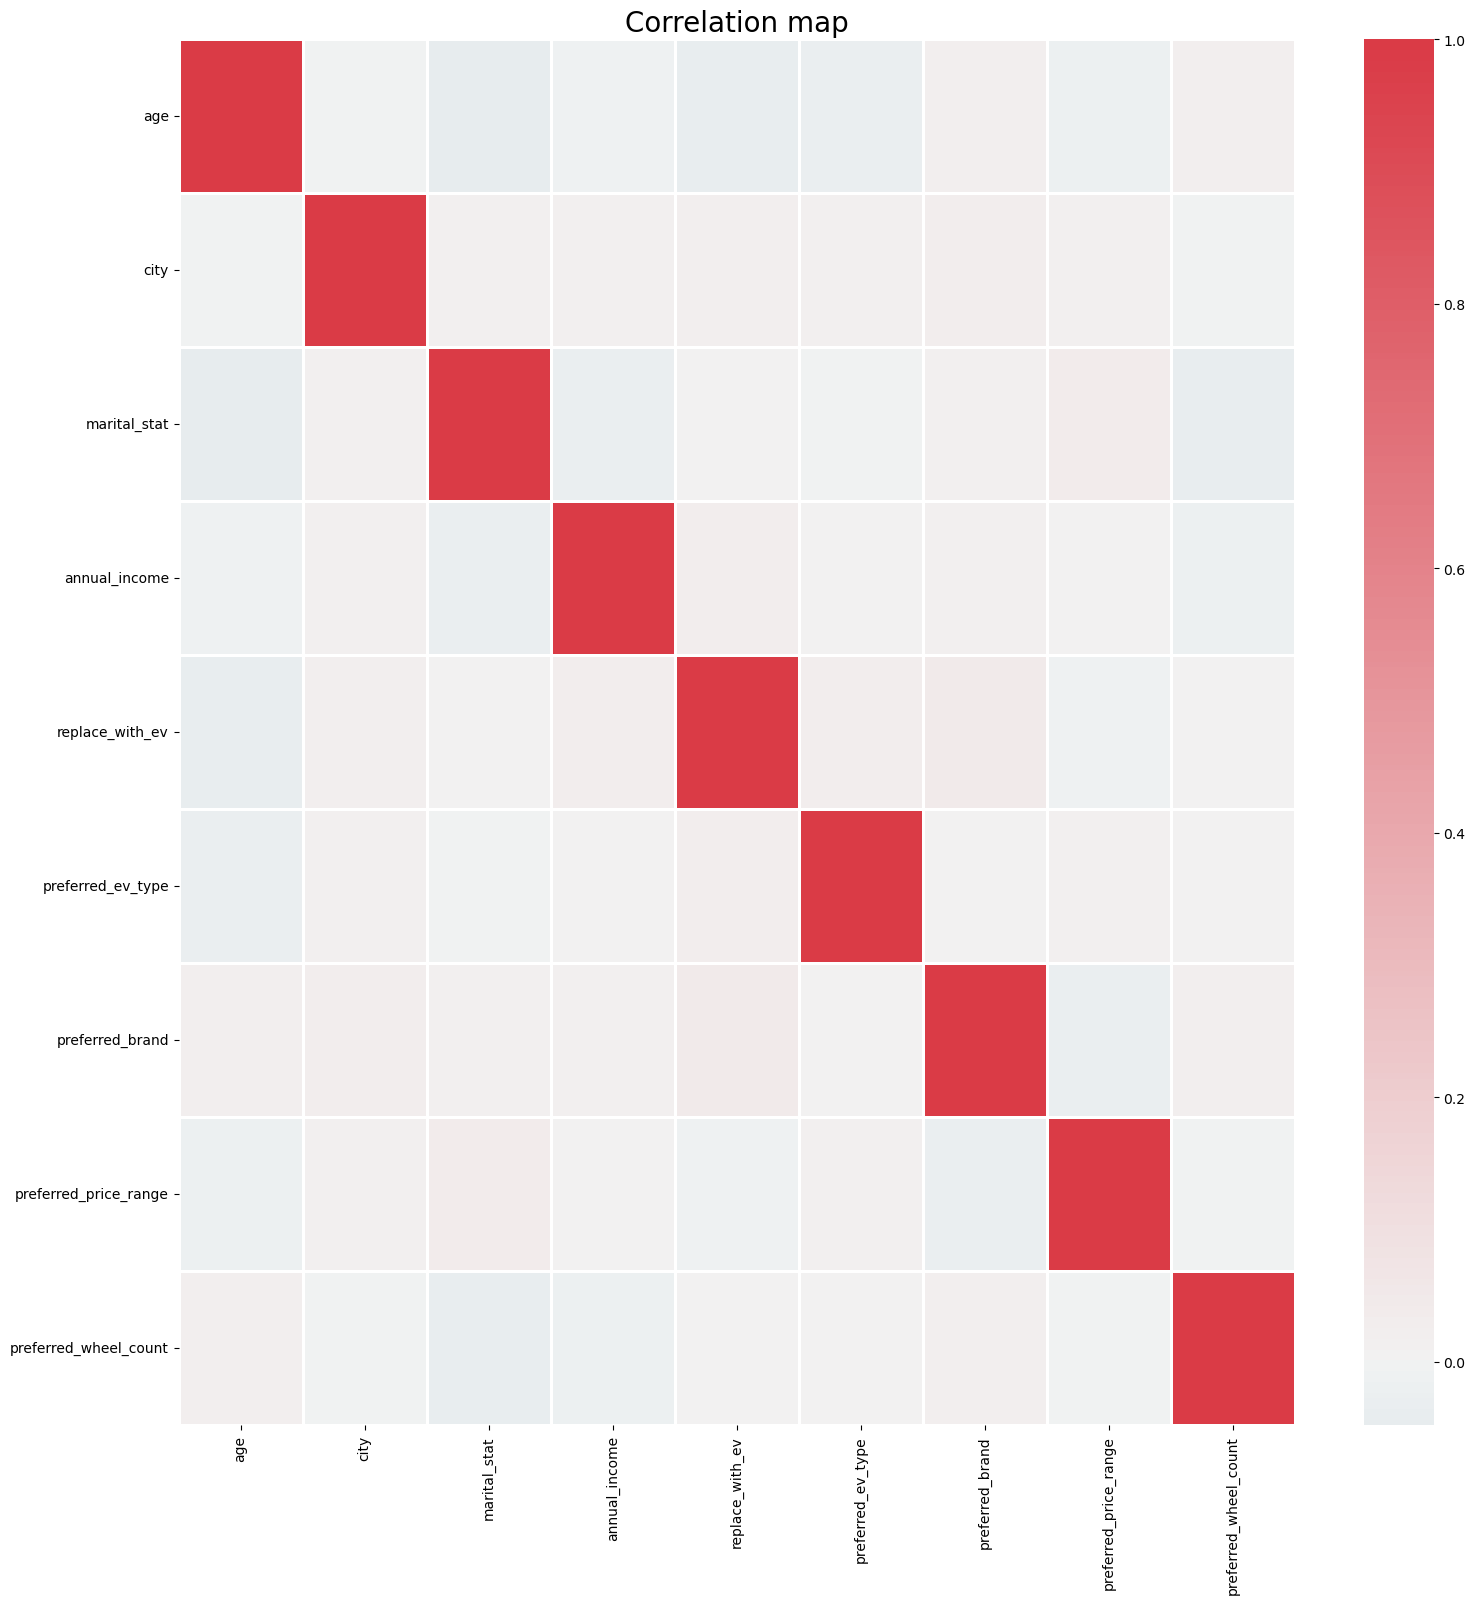

In [26]:
f, ax = plt.subplots(figsize = (18,18))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

heatmap = sns.heatmap(df1.corr(), cmap = cmap, center = 0.0, vmax = 1, ax = ax, linewidth = 1)

plt.title('Correlation map', fontsize = 20)
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [28]:
df_scaled = scaler.fit_transform(df1)
df2 = pd.DataFrame(df_scaled, columns = df1.columns)
df2.head()

,age,city,marital_stat,annual_income,replace_with_ev,preferred_ev_type,preferred_brand,preferred_price_range,preferred_wheel_count
0,-0.159835,-0.018039,0.75428,-0.490254,0.669051,0.242489,-0.392423,1.337083,-1.524048
1,-0.425929,-3.025745,0.75428,-1.499700,0.669051,0.242489,0.934267,-0.887643,0.732956
2,-0.337231,0.545906,0.75428,0.518035,-1.807062,1.180238,-1.055768,1.337083,0.732956
3,-0.514627,0.545906,0.75428,-0.786744,0.669051,1.180238,1.376497,0.224720,-1.524048
4,-0.603325,0.545906,0.75428,0.169305,0.669051,1.180238,-0.834653,-0.887643,0.732956


In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

In [30]:
df3 = pca.fit_transform(df2)
df3.shape

(990, 2)

In [31]:
pca_df = pd.DataFrame(data = df3, columns = ['PCA1', 'PCA2'])
pca_df.head()

,PCA1,PCA2
0,-1.232981,-1.337737
1,0.421178,-0.093417
2,-0.199676,-1.500192
3,-1.833504,0.052238
4,-1.026320,0.213170


In [32]:
y = df1['city']
X = df1.drop(['city'],axis=1)

In [33]:
X.head()

,age,marital_stat,annual_income,replace_with_ev,preferred_ev_type,preferred_brand,preferred_price_range,preferred_wheel_count
0,30,1,1.770466e+06,2,3,6,5,2
1,27,1,7.600731e+05,2,3,12,1,4
2,28,1,2.779701e+06,0,4,3,5,4
3,26,1,1.473698e+06,2,4,14,3,2
4,25,1,2.430643e+06,2,4,4,1,4


In [34]:
y.head()

0    16
1     0
2    19
3    19
4    19
Name: city, dtype: int64

In [35]:
from sklearn.cluster import KMeans

/Users/shraddhadeori/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shraddhadeori/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shraddhadeori/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shraddhadeori/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

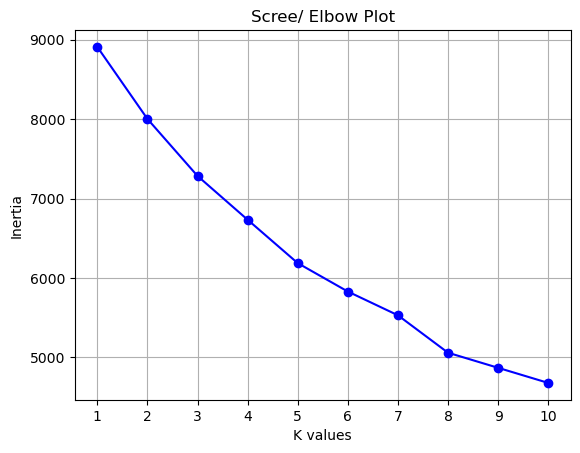

In [36]:
inertia = []
range_val = range(1,11)
for k in range_val:
    model = KMeans(n_clusters = k, init = 'k-means++',random_state = 30)
    model.fit(df2)
    inertia.append(model.inertia_)
    
plt.plot(range_val, inertia, 'bo-')
plt.xlabel('K values')
plt.xticks(np.arange(1,11,1))
plt.ylabel('Inertia')
plt.title('Scree/ Elbow Plot')
plt.grid(True)
plt.show()

/Users/shraddhadeori/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shraddhadeori/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shraddhadeori/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shraddhadeori/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

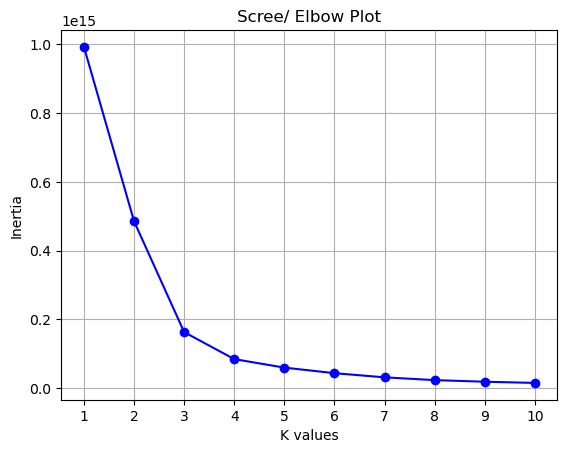

In [37]:
inertia = []
range_val = range(1,11)
for k in range_val:
    model = KMeans(n_clusters = k, init = 'k-means++',random_state = 30)
    model.fit(df1)
    inertia.append(model.inertia_)
    
plt.plot(range_val, inertia, 'bo-')
plt.xlabel('K values')
plt.xticks(np.arange(1,11,1))
plt.ylabel('Inertia')
plt.title('Scree/ Elbow Plot')
plt.grid(True)
plt.show()

**We get k value = 3**

In [38]:
model = KMeans(4)
model.fit_predict(df3)
pca_df_kmeans = pd.concat([pca_df, pd.DataFrame({'cluster': model.labels_})], axis = 1)

/Users/shraddhadeori/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


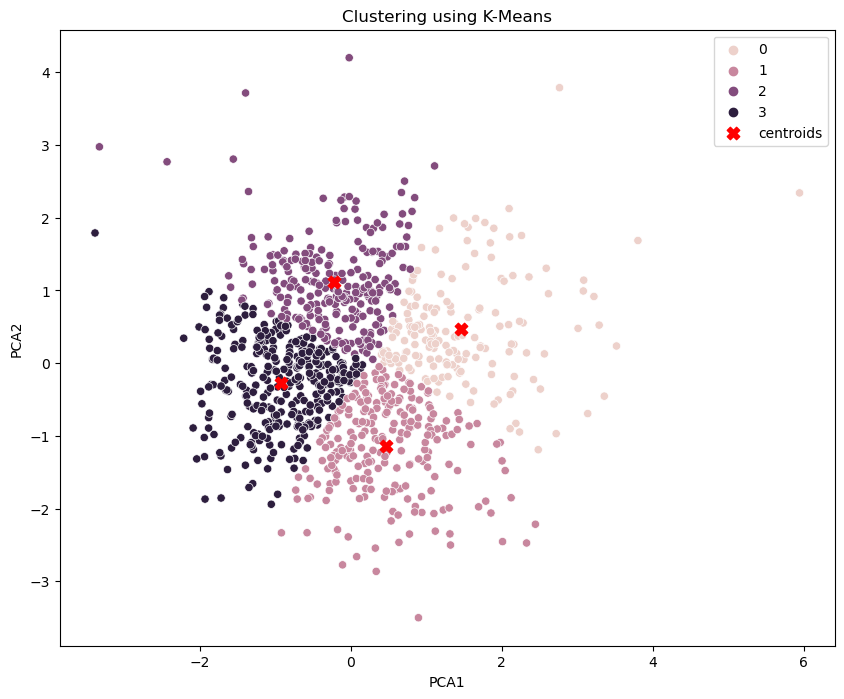

In [39]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'cluster', data = pca_df_kmeans)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker = 'X', c = 'r', s = 80, label = 'centroids')
plt.title('Clustering using K-Means')
plt.legend()
plt.show()

In [40]:
## Creating a target column 'Cluster' for storing clustered segments
new_df = pd.concat([df1, pd.DataFrame({'Cluster': model.labels_})], axis = 1)
new_df.head()

,age,city,marital_stat,annual_income,replace_with_ev,preferred_ev_type,preferred_brand,preferred_price_range,preferred_wheel_count,Cluster
0,30,16,1,1.770466e+06,2,3,6,5,2,3
1,27,0,1,7.600731e+05,2,3,12,1,4,1
2,28,19,1,2.779701e+06,0,4,3,5,4,1
3,26,19,1,1.473698e+06,2,4,14,3,2,3
4,25,19,1,2.430643e+06,2,4,4,1,4,3


In [41]:
df_0 = new_df[new_df['Cluster'] == 0]
df_1 = new_df[new_df['Cluster'] == 1]
df_2 = new_df[new_df['Cluster'] == 2]
df_3 = new_df[new_df['Cluster'] == 3]

<Axes: xlabel='Cluster', ylabel='count'>

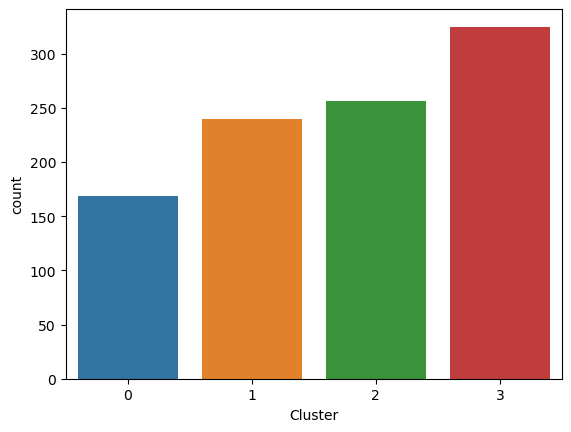

In [42]:
sns.countplot(x = 'Cluster', data = new_df)

/Users/shraddhadeori/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/shraddhadeori/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/shraddhadeori/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/shraddhadeori/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/shraddhadeori/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/shraddhadeori/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserW

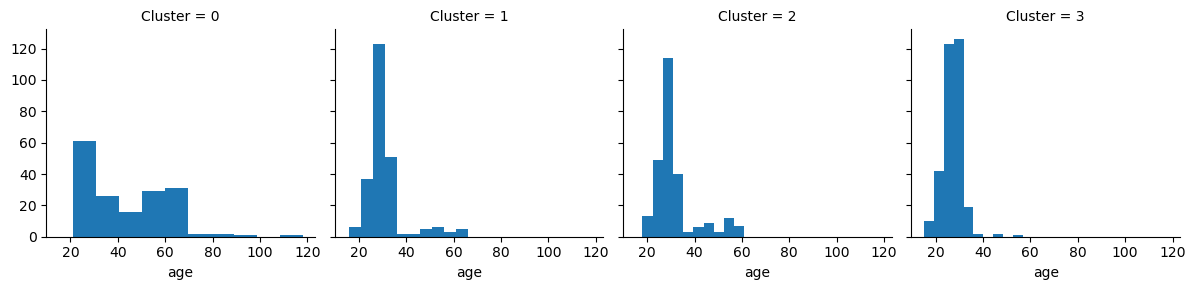

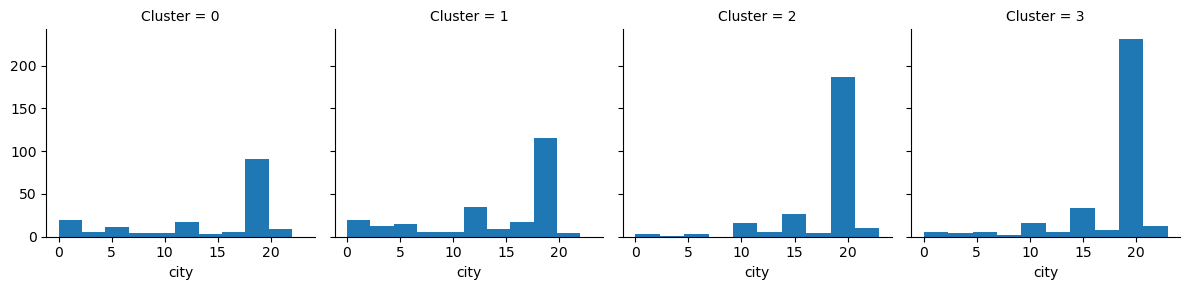

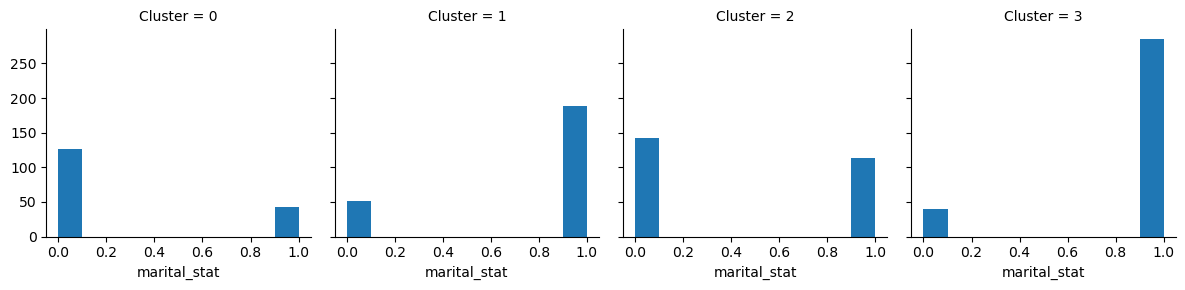

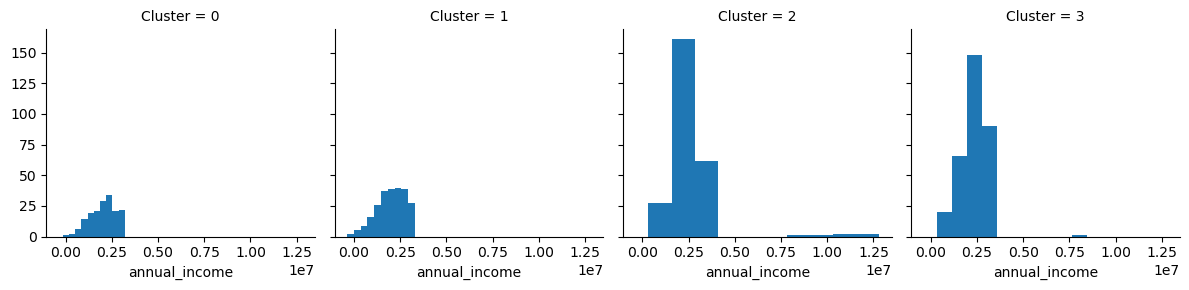

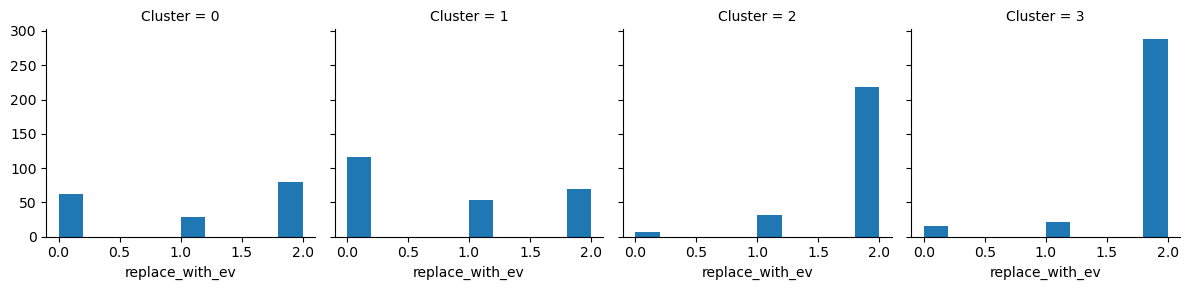

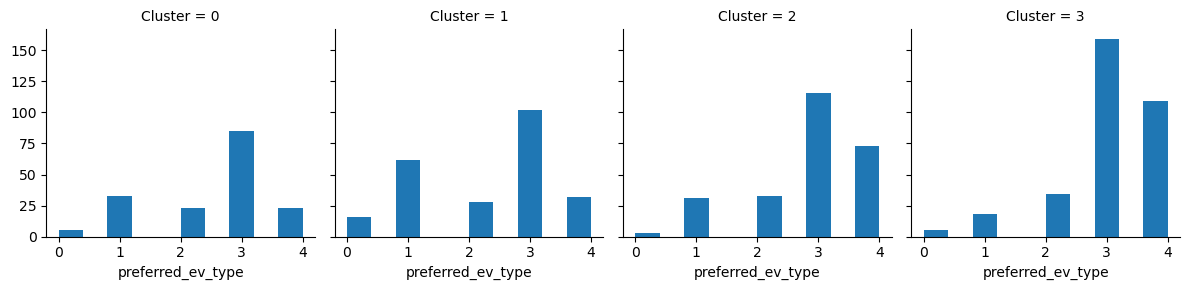

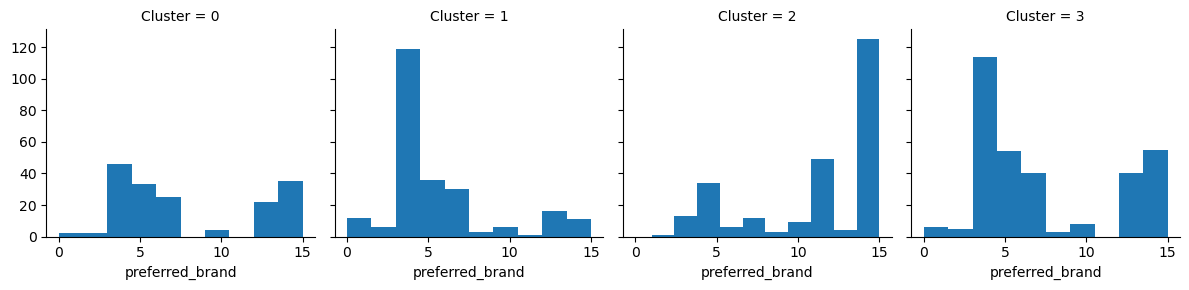

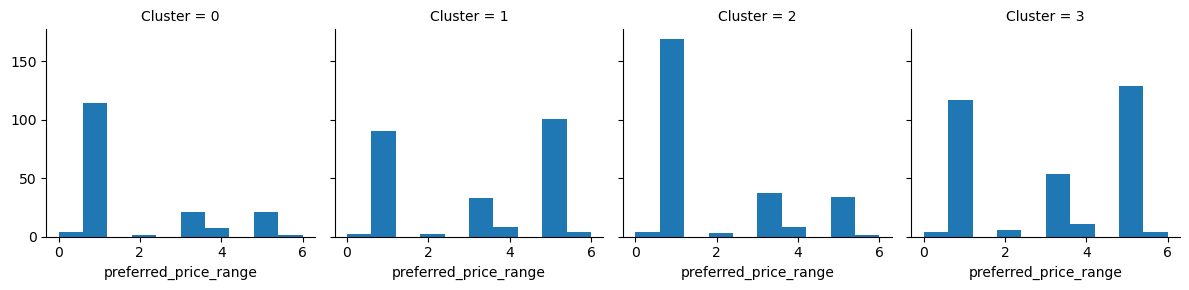

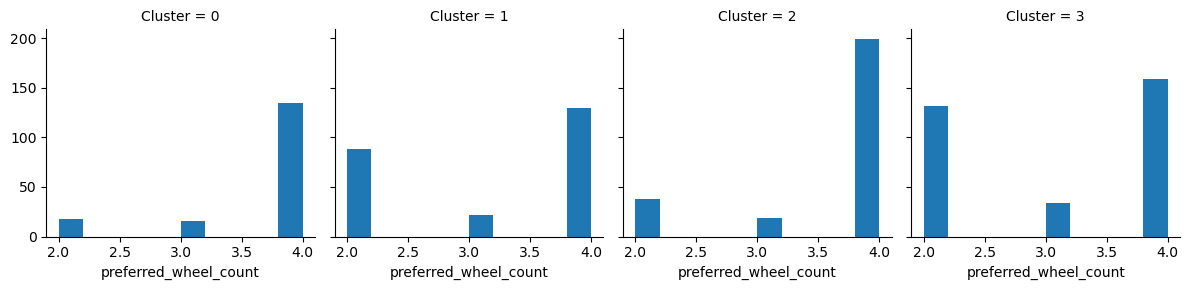

In [43]:
c_drop_new_df = new_df.drop(['Cluster'], axis = 1)

for c in c_drop_new_df:
    grid = sns.FacetGrid(new_df, col = 'Cluster')
    grid = grid.map(plt.hist, c)
plt.show()

In [44]:
cluster_count = new_df['Cluster'].value_counts()
cluster_count

Cluster
3    325
2    256
1    240
0    169
Name: count, dtype: int64

In [45]:
df4 = new_df.copy()
df4.shape

(990, 10)

In [46]:
df5 = pd.concat([data, pd.DataFrame({'Cluster': model.labels_})], axis = 1)
df5.head()

,age,city,profession,marital_stat,education,family_count,annual_income,replace_with_ev,preferred_ev_type,think_ev_are_economical,preferred_brand,preferred_price_range,preferred_wheel_count,Cluster
0,30,New Delhi,Working Professional,Single,Post Graduate,4,1.770466e+06,Yes,SUV,Yes,MG,<5 lakhs,2,3
1,27,Ahmedabad,NaN,Single,Post Graduate,4,7.600731e+05,Yes,SUV,Yes,Nissan,<15 lakhs,4,1
2,28,Pune,Working Professional,Single,Post Graduate,4,2.779701e+06,Maybe,Sedan,Yes,Honda,<5 lakhs,4,1
3,26,Pune,Salaried,Single,Post Graduate,4,1.473698e+06,Yes,Sedan,Yes,Tata,<25 lakhs,2,3
4,25,Pune,Working Professional,Single,Post Graduate,4,2.430643e+06,Yes,Sedan,Yes,Hyundai,<15 lakhs,4,3


In [47]:
c_0 = df5[df5['Cluster'] == 0]
c_1 = df5[df5['Cluster'] == 1]
c_2 = df5[df5['Cluster'] == 2]
c_3 = df5[df5['Cluster'] == 3]

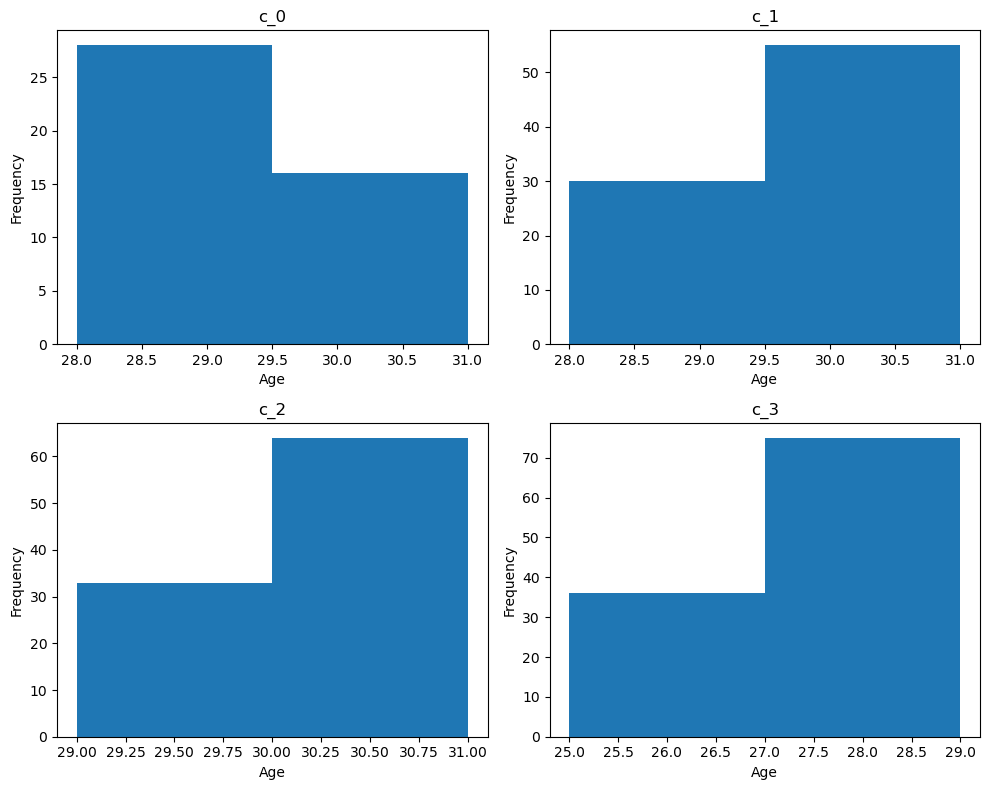

In [54]:
# List of your datasets
datasets = [c_0, c_1, c_2, c_3]

# Create subplots to display histograms
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Iterate through datasets and create histograms for the top 3 most common ages
for i, dataset in enumerate(datasets):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    
    # Get the top 3 most common ages and their counts
    top_ages = dataset['age'].value_counts().head(3)
    
    # Create a histogram for the top ages in the current dataset
    ax.hist(top_ages.index, bins = 2, weights = top_ages.values)
    
    # Set labels and titles
    ax.set_xlabel('Age')
    ax.set_ylabel('Frequency')
    ax.set_title(f'c_{i}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**Ages 28 - 30 are to be targeted

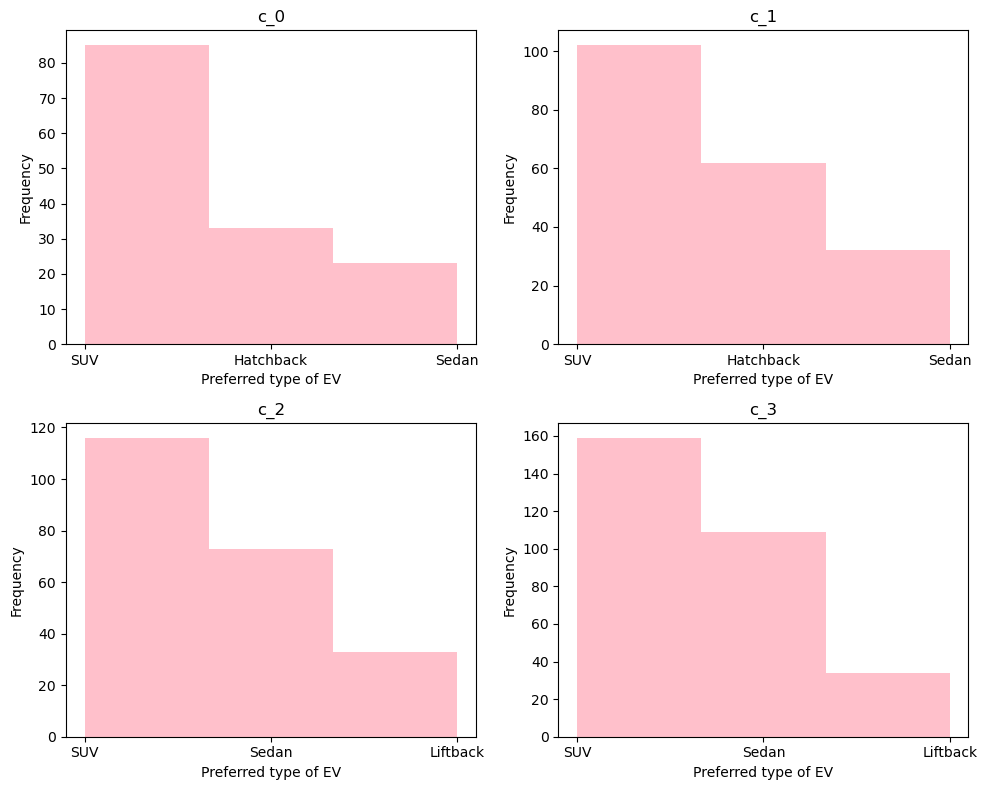

In [49]:
# Create subplots to display histograms
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Iterate through datasets and create histograms for the top 3 most common ages
for i, dataset in enumerate(datasets):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    
    # Get the top 3 most common ages and their counts
    top_ev_type = dataset['preferred_ev_type'].value_counts().head(3)
    
    # Create a histogram for the top ages in the current dataset
    ax.hist(top_ev_type.index, bins = 3, weights = top_ev_type.values, color = 'pink')
    
    # Set labels and titles
    ax.set_xlabel('Preferred type of EV')
    ax.set_ylabel('Frequency')
    ax.set_title(f'c_{i}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**SUV and Sedan are the most popular vehicle type found in all the clusters. So these are to be manufactured in maximum numbers.

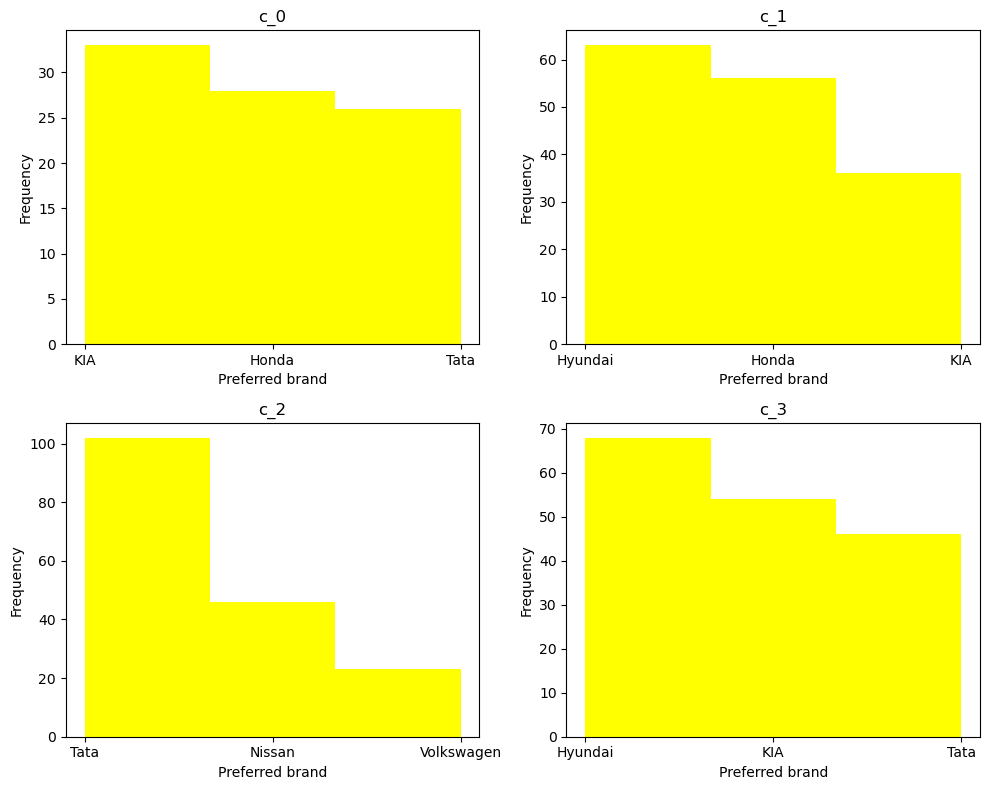

In [50]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Iterate through datasets and create histograms for the top 3 most common ages
for i, dataset in enumerate(datasets):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    
    # Get the top 3 most common ages and their counts
    top_brand = dataset['preferred_brand'].value_counts().head(3)
    
    # Create a histogram for the top ages in the current dataset
    ax.hist(top_brand.index, bins = 3, weights = top_brand.values, color = 'yellow')
    
    # Set labels and titles
    ax.set_xlabel('Preferred brand')
    ax.set_ylabel('Frequency')
    ax.set_title(f'c_{i}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**Tata and Kia are the most preferred brand among all the segments.

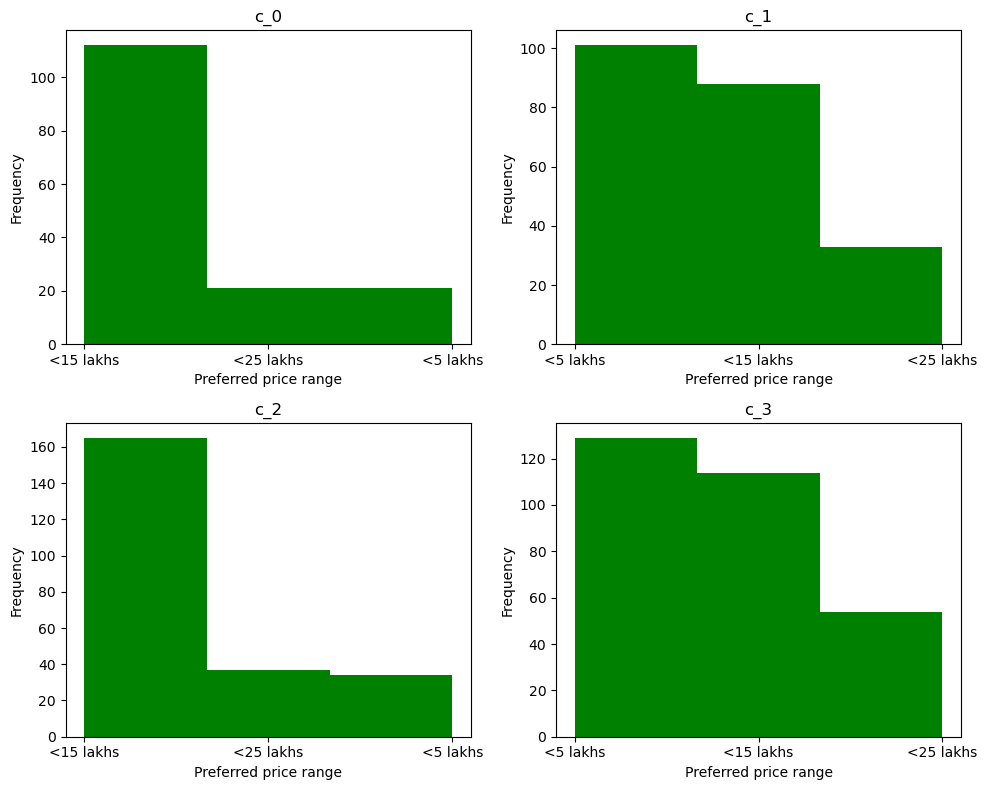

In [51]:
fig, axs = plt.subplots(2, 2, figsize = (10, 8))

for i, dataset in enumerate(datasets):
    row = i//2
    col = i%2
    ax = axs[row, col]
    
    top_price_range = dataset['preferred_price_range'].value_counts().head(3)
    
    ax.hist(top_price_range.index, bins = 3, weights = top_price_range, color = 'green')
    
    ax.set_xlabel('Preferred price range')
    ax.set_ylabel('Frequency')
    ax.set_title(f'c_{i}')
    
plt.tight_layout()

plt.show()

**Cars should be produced between marketing price of 5-15 lacs.

In [1]:
fig, axs = plt.subplots(2, 2, figsize = (10, 8))

for i, dataset in enumerate(datasets):
    row = i//2
    col = i%2
    ax = axs[row, col]
    
    top_count_wheel = dataset['preferred_wheel_count'].value_counts().head(3)
    
    ax.hist(top_count_wheel.index, bins = 3, weights = top_count_wheel, color = 'red')
    
    ax.set_xlabel('Preferred wheel count')
    ax.set_ylabel('Frequency')
    ax.set_title(f'c_{i}')
    
plt.tight_layout()

plt.show()

NameError: name 'plt' is not defined

**4 wheeler EV are the most popular with 3 wheeler EV being the least popular in all the segments. 